In [6]:
In [1]: input_vector = [1.72, 1.23]
In [2]: weights_1 = [1.26, 0]
In [3]: weights_2 = [2.17, 0.32]

In [4]: # Computing the dot product of input_vector and weights_1
In [5]: first_indexes_mult = input_vector[0] * weights_1[0]
In [6]: second_indexes_mult = input_vector[1] * weights_1[1]
In [7]: dot_product_1 = first_indexes_mult + second_indexes_mult

In [8]: print(f"The dot product is: {dot_product_1}")


The dot product is: 2.1672


In [7]:
In [9]: import numpy as np

In [10]: dot_product_1 = np.dot(input_vector, weights_1)

In [11]: print(f"The dot product is: {dot_product_1}")
    
In [10]: dot_product_2 = np.dot(input_vector, weights_2)

In [11]: print(f"The dot product is: {dot_product_2}")

The dot product is: 2.1672
The dot product is: 4.1259999999999994


since the dot product of input_vector and weights_2 is 4.1259, and 4.1259 is greater than 2.1672, it means that input_vector is more similar to weights_2. You’ll use this same mechanism in your neural network.

If the multiplication result is 0, then you’ll say that the coordinates are not similar.

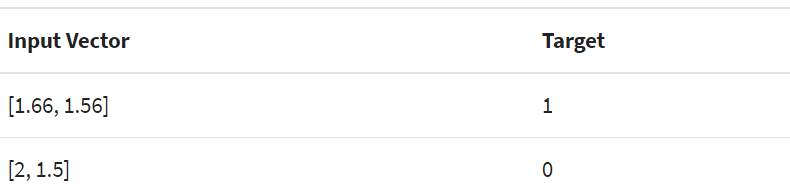

In [11]:
In [12]: # Wrapping the vectors in NumPy arrays
In [13]: input_vector = np.array([1.66, 1.56])
In [14]: weights_1 = np.array([1.45, -0.66])
In [15]: bias = np.array([0.0])

In [16]: def sigmoid(x):
   ...:     return 1 / (1 + np.exp(-x))

In [17]: def make_prediction(input_vector, weights, bias):
   ...:      layer_1 = np.dot(input_vector, weights) + bias
   ...:      layer_2 = sigmoid(layer_1)
   ...:      return layer_2

In [18]: prediction = make_prediction(input_vector, weights_1, bias)

In [19]: print(f"The prediction result is: {prediction}")


The prediction result is: [0.7985731]


The raw prediction result is 0.79, which is higher than 0.5, so the output is 1. The network made a correct prediction

In [13]:
In [20]: # Changing the value of input_vector
In [21]: input_vector = np.array([2, 1.5])

In [22]: prediction = make_prediction(input_vector, weights_1, bias)

In [23]: print(f"The prediction result is: {prediction}")

The prediction result is: [0.87101915]


This time, the network made a wrong prediction. The result should be less than 0.5 since the target for this input is 0, but the raw result was 0.87. It made a wrong guess, but how bad was the mistake?

### Computing the Prediction Error

Loss Function:

MSE is the squared difference between the prediction and the correct result, with this metric you’ll always end up with a positive value.

you’ll use the mean squared error (MSE) as your cost function. You compute the MSE in two steps:

Compute the difference between the prediction and the target.
Multiply the result by itself.

One implication of multiplying the difference by itself is that bigger errors have an even larger impact, and smaller errors keep getting smaller as they decrease

In [14]:
In [24]: target = 0

In [25]: mse = np.square(prediction - target)

In [26]: print(f"Prediction: {prediction}; Error: {mse}")


Prediction: [0.87101915]; Error: [0.75867436]


#How to Reduce the Error

 If you treat (prediction - target) as a single variable x, then you have error = np.square(x), which is a quadratic function. Here’s how the function looks if you plot it:

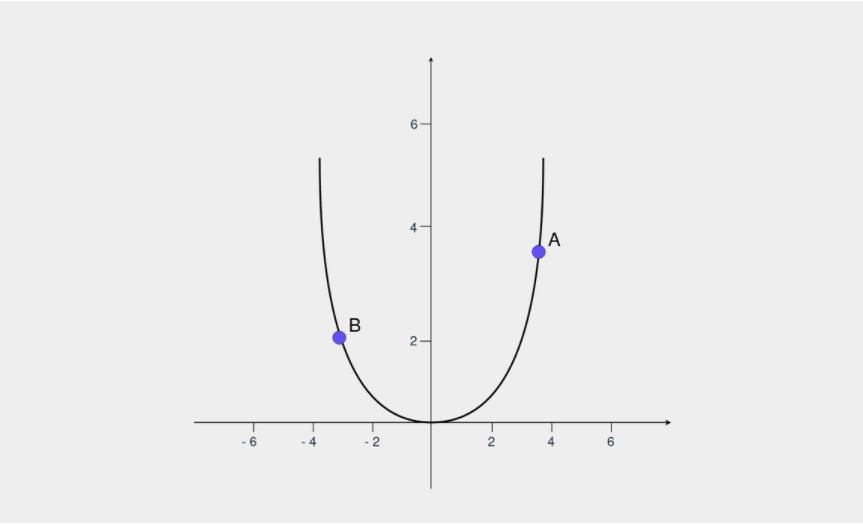

The error is given by the y-axis. If you’re in point A and want to reduce the error toward 0, then you need to bring the x value down. On the other hand, if you’re in point B and want to reduce the error, then you need to bring the x value up. To know which direction you should go to reduce the error, you’ll use the derivative. A derivative explains exactly how a pattern will change.

Another word for the derivative is gradient. Gradient descent is the name of the algorithm used to find the direction and the rate to update the network parameters.

The power rule states that the derivative of xⁿ is nx⁽ⁿ⁻¹⁾. So the derivative of np.square(x) is 2 * x, and the derivative of x is 1.

By taking the derivative of this function, you want to know in what direction should you change x to bring the result of error to zero, thereby reducing the error.

When it comes to your neural network, the derivative will tell you the direction you should take to update the weights variable. If it’s a positive number, then you predicted too high, and you need to decrease the weights. If it’s a negative number, then you predicted too low, and you need to increase the weights.

Now it’s time to write the code to figure out how to update weights_1 for the previous wrong prediction. If the mean squared error is 0.75, then should you increase or decrease the weights? Since the derivative is 2 * x, you just need to multiply the difference between the prediction and the target by 2:

In [15]:
In [27]: derivative = 2 * (prediction - target)

In [28]: print(f"The derivative is {derivative}")

The derivative is [1.7420383]


The result is 1.74, a positive number, so you need to decrease the weights. You do that by subtracting the derivative result of the weights vector. Now you can update weights_1 accordingly and predict again to see how it affects the prediction result:

In [16]:
In [29]: # Updating the weights
In [30]: weights_1 = weights_1 - derivative

In [31]: prediction = make_prediction(input_vector, weights_1, bias)

In [32]: error = (prediction - target) ** 2

In [33]: print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.01496248]; Error: [0.00022388]


High increments aren’t ideal because you could keep going from point A straight to point B, never getting close to zero. To cope with that, you update the weights with a fraction of the derivative result.

To define a fraction for updating the weights, you use the alpha parameter, also called the learning rate. If you decrease the learning rate, then the increments are smaller. If you increase it, then the steps are higher.

If you take the new weights and make a prediction with the first input vector, then you’ll see that now it makes a wrong prediction for that one. If your neural network makes a correct prediction for every instance in your training set, then you probably have an overfitted model, where the model simply remembers how to classify the examples instead of learning to notice features in the data.